## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix

# Q.1. Company Data

## Importing Data

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is A239-1DCD

 Directory of C:\Users\HP\Documents\EXCELR ASSIGNMENTS\Decision Tree Assignment

17-01-2023  02:02    <DIR>          .
17-01-2023  02:02    <DIR>          ..
12-01-2023  00:47    <DIR>          .ipynb_checkpoints
05-12-2022  11:07            17,023 Company_Data.csv
17-01-2023  02:02         3,495,360 Decision Tree Assignment.ipynb
05-12-2022  11:07            21,837 Fraud_check.csv
05-12-2022  11:07             1,377 problem statement(company data).txt
05-12-2022  11:07               460 Problem_statement(Fraudcheck).txt
               5 File(s)      3,536,057 bytes
               3 Dir(s)  150,898,532,352 bytes free


In [3]:
company_data= pd.read_csv('Company_Data.csv')
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


## EDA

In [4]:
company_data.shape

(400, 11)

In [5]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
company_data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
company_data.value_counts()

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  Education  Urban  US 
0.00   139        24      0            358         185    Medium     79   15         No     No     1
8.65   123        76      18           218         120    Medium     29   14         No     Yes    1
8.75   143        77      25           448         156    Medium     43   17         Yes    Yes    1
8.74   155        80      0            237         124    Medium     37   14         Yes    No     1
8.73   129        76      16           58          121    Medium     69   12         Yes    Yes    1
                                                                                                  ..
6.01   131        29      11           335         127    Bad        33   12         Yes    Yes    1
5.99   117        42      10           371         121    Bad        26   14         Yes    Yes    1
5.98   124        56      11           447         134    Medium     53   12         No     Yes 

In [8]:
company_data["US"].value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [9]:
company_data["Urban"].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [10]:
company_data["ShelveLoc"].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [11]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


## Converting Target variable 'Sales' into categories Low, Medium and High

In [12]:
bins=np.linspace(min(company_data['Sales']), max(company_data['Sales']), 4 )
bins

array([ 0.        ,  5.42333333, 10.84666667, 16.27      ])

In [13]:
label_names = ['Low', 'Medium', 'High']

In [14]:
company_data['Sales_bin'] = pd.cut(company_data['Sales'], bins, labels=label_names, include_lowest=True )
company_data[['Sales','Sales_bin']].head()

,Sales,Sales_bin
0,9.50,Medium
1,11.22,High
2,10.06,Medium
3,7.40,Medium
4,4.15,Low


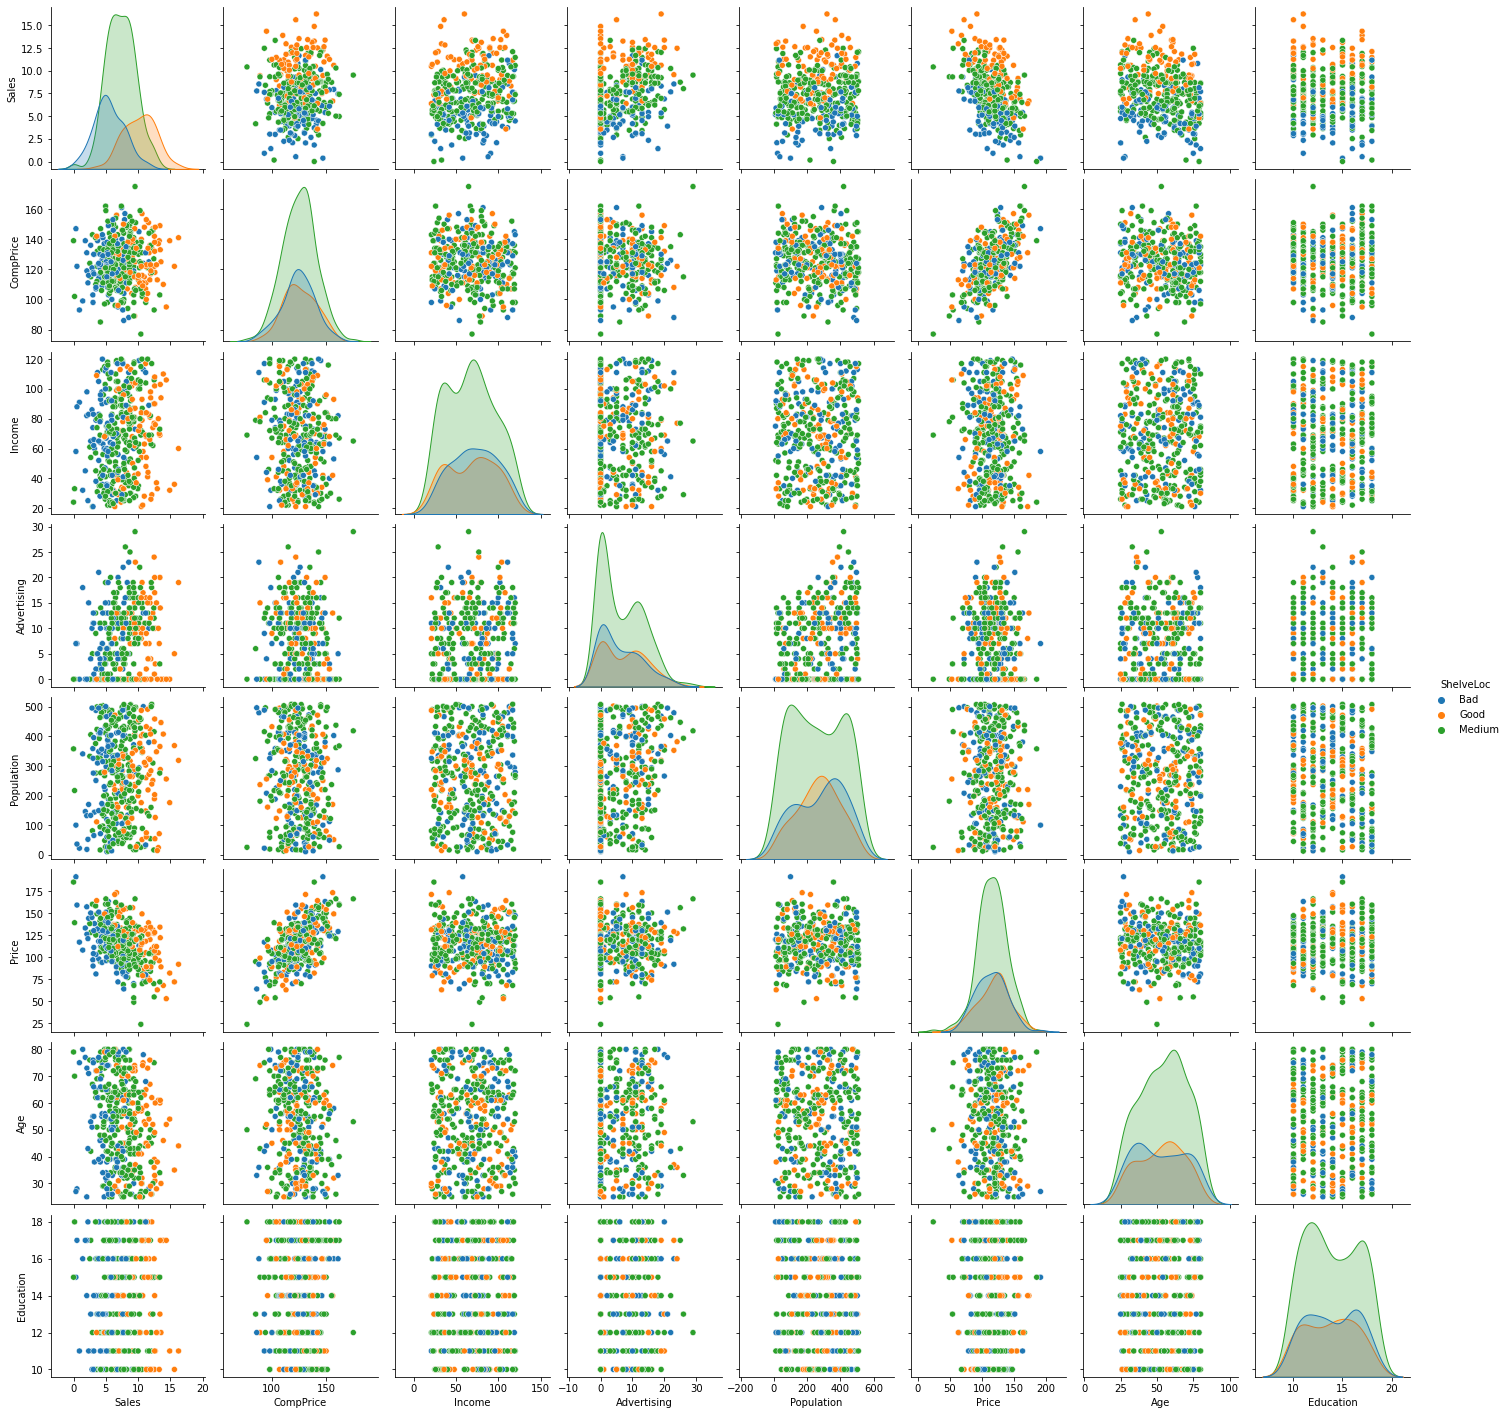

In [15]:
sns.pairplot(data=company_data, hue='ShelveLoc')

In [16]:
company_data=pd.get_dummies(company_data,columns=['Urban','US'], drop_first=True)
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Sales_bin,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,Medium,1,1
1,11.22,111,48,16,260,83,Good,65,10,High,1,1
2,10.06,113,35,10,269,80,Medium,59,12,Medium,1,1
3,7.40,117,100,4,466,97,Medium,55,14,Medium,1,1
4,4.15,141,64,3,340,128,Bad,38,13,Low,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,High,1,1
396,6.14,139,23,3,37,120,Medium,55,11,Medium,0,1
397,7.41,162,26,12,368,159,Medium,40,18,Medium,1,1
398,5.94,100,79,7,284,95,Bad,50,12,Medium,1,1


In [17]:
company_data['ShelveLoc']=company_data['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [18]:
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Sales_bin,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,3,42,17,Medium,1,1
1,11.22,111,48,16,260,83,1,65,10,High,1,1
2,10.06,113,35,10,269,80,2,59,12,Medium,1,1
3,7.40,117,100,4,466,97,2,55,14,Medium,1,1
4,4.15,141,64,3,340,128,3,38,13,Low,1,0


## Splitting Data into input and output variable

In [19]:
X=company_data.iloc[:,0:6]
Y=company_data['ShelveLoc']

In [20]:
X

,Sales,CompPrice,Income,Advertising,Population,Price
0,9.50,138,73,11,276,120
1,11.22,111,48,16,260,83
2,10.06,113,35,10,269,80
3,7.40,117,100,4,466,97
4,4.15,141,64,3,340,128
...,...,...,...,...,...,...
395,12.57,138,108,17,203,128
396,6.14,139,23,3,37,120
397,7.41,162,26,12,368,159
398,5.94,100,79,7,284,95


In [21]:
Y

0      3
1      1
2      2
3      2
4      3
      ..
395    1
396    2
397    2
398    3
399    1
Name: ShelveLoc, Length: 400, dtype: int64

In [22]:
company_data.ShelveLoc.unique()

array([3, 1, 2], dtype=int64)

In [23]:
company_data.ShelveLoc.value_counts()

2    219
3     96
1     85
Name: ShelveLoc, dtype: int64

In [24]:
colnames = list(company_data.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Sales_bin',
 'Urban_Yes',
 'US_Yes']

## Splitting Data into training and testing data

In [25]:
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.33,random_state=40)

# Building model by entropy Criterion

In [26]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

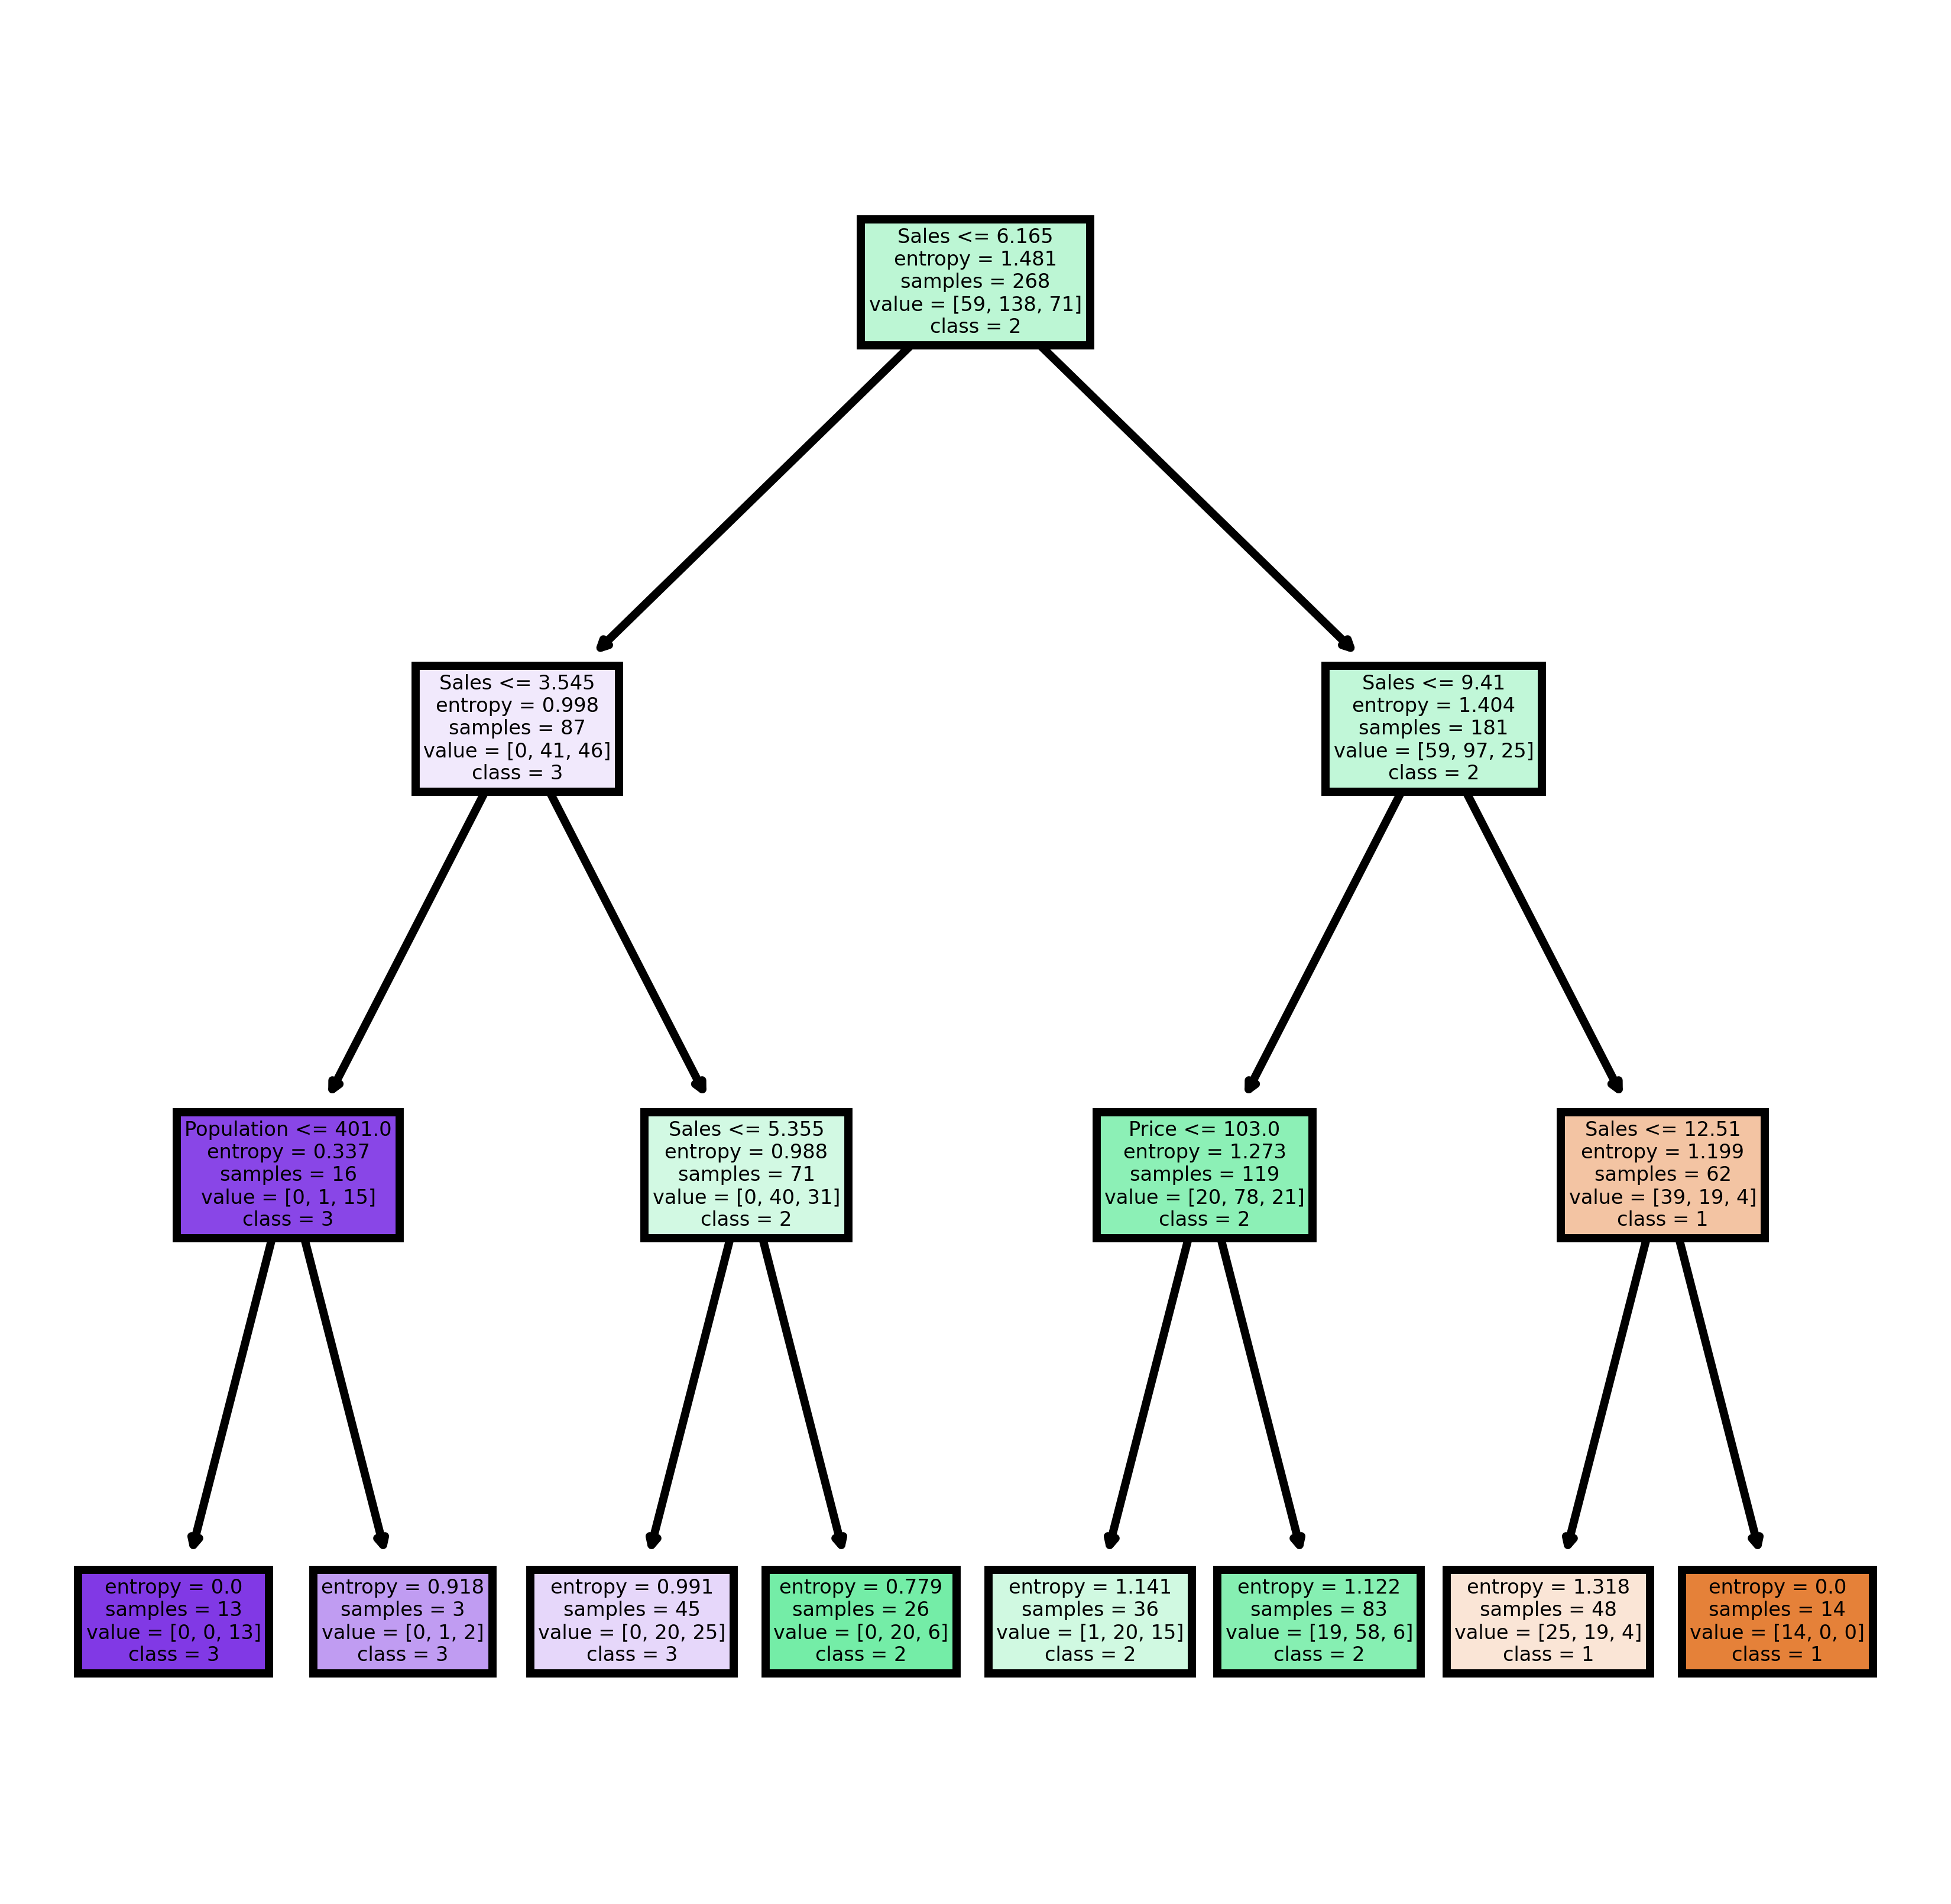

In [27]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price']
cn=['1', '2', '3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [28]:
preds = model.predict(x_test) 
pd.Series(preds).value_counts()

2    63
3    37
1    32
dtype: int64

In [29]:
preds

array([1, 2, 1, 2, 2, 3, 1, 1, 2, 1, 3, 3, 2, 2, 1, 3, 2, 2, 3, 3, 1, 1,
       1, 2, 3, 3, 2, 3, 1, 1, 1, 2, 1, 2, 3, 1, 2, 2, 2, 2, 2, 3, 3, 2,
       3, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2, 1, 1, 2, 3, 3, 3, 3, 1, 2, 3, 2,
       2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 1, 3,
       1, 1, 2, 3, 1, 1, 2, 3, 3, 1, 3, 3, 1, 2, 2, 2, 2, 3, 2, 2, 1, 2,
       3, 2, 1, 2, 2, 3, 2, 1, 1, 3, 2, 1, 2, 2, 3, 2, 3, 3, 2, 3, 1, 2],
      dtype=int64)

In [30]:
pd.crosstab(y_test,preds)

col_0,1,2,3
ShelveLoc,,,
1,14,10,2
2,17,41,23
3,1,12,12


In [31]:
metrics.accuracy_score(preds,y_test)

0.5075757575757576

In [32]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       0.44      0.54      0.48        26
           2       0.65      0.51      0.57        81
           3       0.32      0.48      0.39        25

    accuracy                           0.51       132
   macro avg       0.47      0.51      0.48       132
weighted avg       0.55      0.51      0.52       132



In [33]:
print(confusion_matrix(y_test,preds))

[[14 10  2]
 [17 41 23]
 [ 1 12 12]]


# Building Model by Gini Criterion

In [34]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [35]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

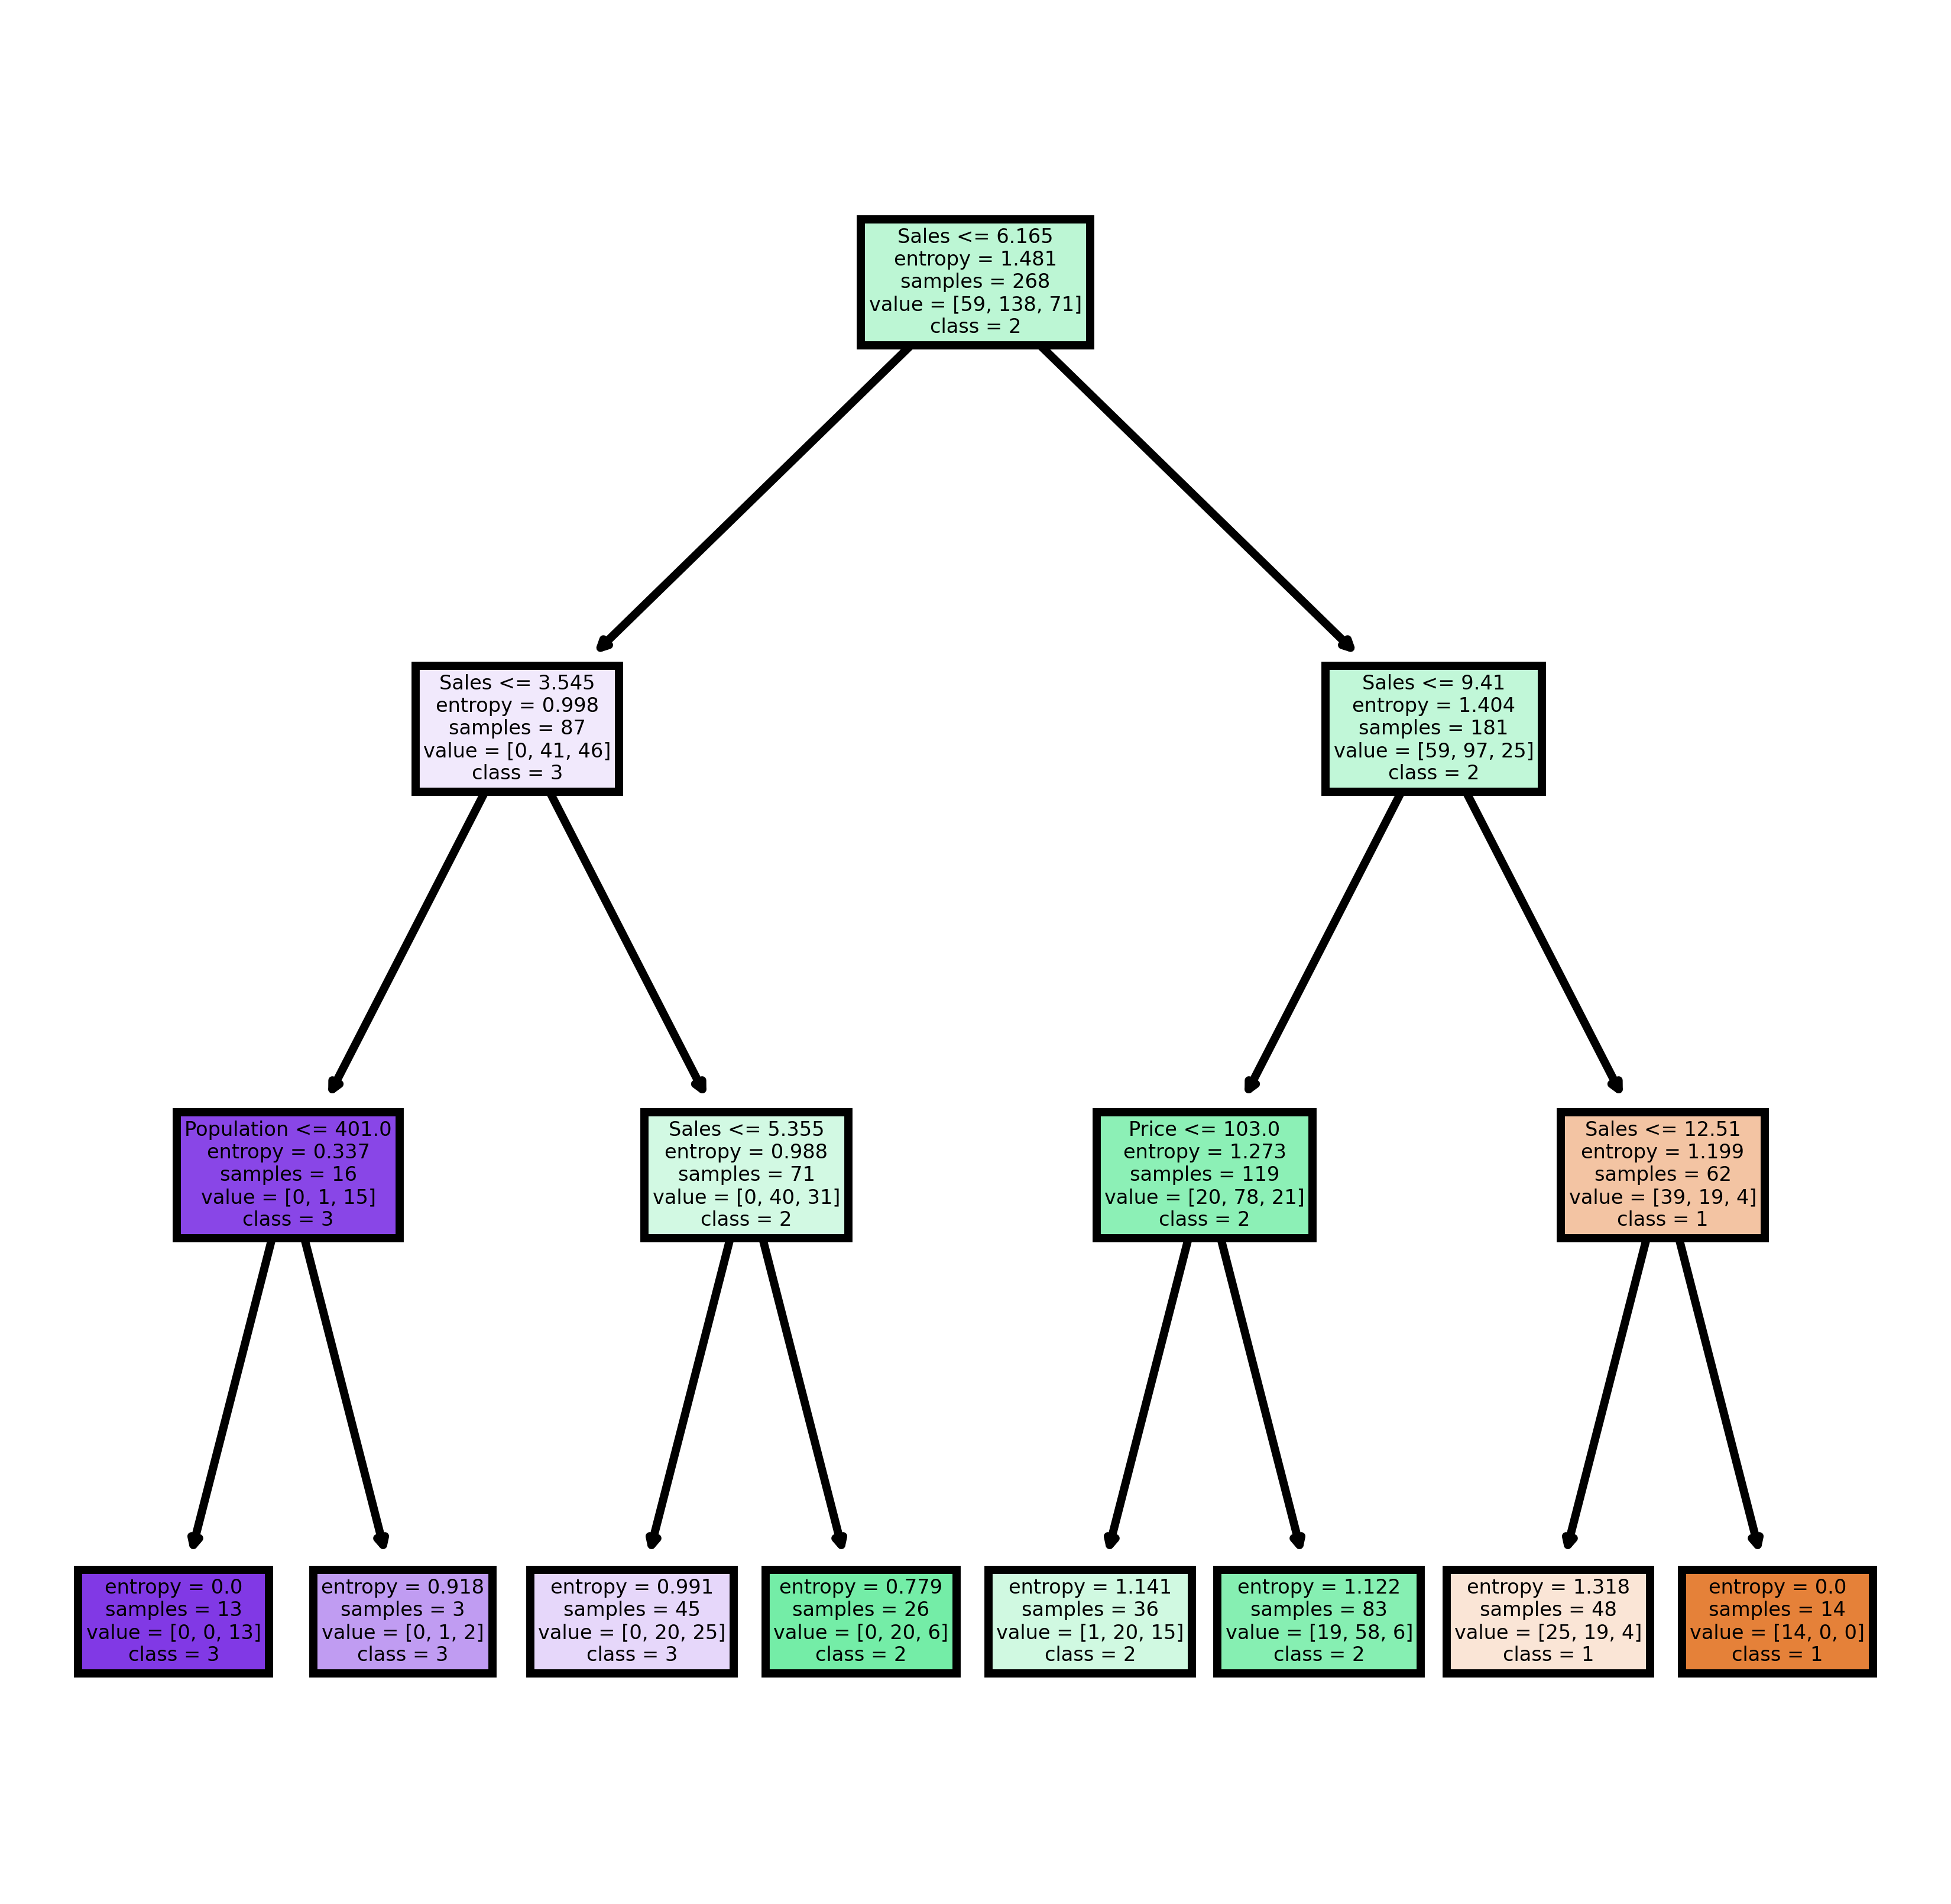

In [36]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price']
cn=['1', '2', '3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [37]:
preds=model.predict(x_test)
metrics.accuracy_score(preds,y_test)

0.5075757575757576

In [38]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       0.44      0.54      0.48        26
           2       0.65      0.51      0.57        81
           3       0.32      0.48      0.39        25

    accuracy                           0.51       132
   macro avg       0.47      0.51      0.48       132
weighted avg       0.55      0.51      0.52       132



In [39]:
print(confusion_matrix(y_test,preds))

[[14 10  2]
 [17 41 23]
 [ 1 12 12]]


# Q.2. Fraud Check

## Importing Data

In [40]:
fraud_check= pd.read_csv('Fraud_check.csv')
fraud_check.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


## EDA

In [41]:
fraud_check.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [42]:
fraud_check.shape

(600, 6)

In [43]:
fraud_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [44]:
fraud_check.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [45]:
fraud_check.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [46]:
label_encoder = LabelEncoder()
fraud_check['Undergrad'] = label_encoder.fit_transform(fraud_check['Undergrad'])
fraud_check['Marital.Status'] = label_encoder.fit_transform(fraud_check['Marital.Status'])
fraud_check['Urban'] = label_encoder.fit_transform(fraud_check['Urban'])
fraud_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int32
 1   Marital.Status   600 non-null    int32
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int32
dtypes: int32(3), int64(3)
memory usage: 21.2 KB


In [47]:
fraud_check.rename(columns = {'Marital.Status' : 'marital_status', 'Taxable.Income': 'Income', 'City.Population': 'Population',
                    'Work.Experience': 'work_exp'}, inplace= True)

In [48]:
fraud_check

,Undergrad,marital_status,Income,Population,work_exp,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [49]:
fraud_check["Urban"].value_counts()

1    302
0    298
Name: Urban, dtype: int64

In [50]:
fraud_check["marital_status"].value_counts()

2    217
1    194
0    189
Name: marital_status, dtype: int64

In [51]:
fraud_check["Undergrad"].value_counts()

1    312
0    288
Name: Undergrad, dtype: int64

In [52]:
fraud_check['status'] = fraud_check['Income'].apply(lambda Income: 'Risky' if Income <= 30000 else 'Good')

In [53]:
fraud_check.head()

,Undergrad,marital_status,Income,Population,work_exp,Urban,status
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good


In [54]:
fraud_check.drop(['Income'], axis=1, inplace=True)

In [55]:
fraud_check.head()

,Undergrad,marital_status,Population,work_exp,Urban,status
0,0,2,50047,10,1,Good
1,1,0,134075,18,1,Good
2,0,1,160205,30,1,Good
3,1,2,193264,15,1,Good
4,0,1,27533,28,0,Good


In [56]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
fraud_check['status'] = label_encoder.fit_transform(fraud_check['status'])

## Splitting Data into input and output variable

In [57]:
X=fraud_check.iloc[:,0:-1]
y=fraud_check.iloc[:,-1]

In [58]:
X

,Undergrad,marital_status,Population,work_exp,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [59]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: status, Length: 600, dtype: int32

In [60]:
fraud_check['Urban'].unique()

array([1, 0])

In [61]:
colnames = list(fraud_check.columns)
colnames

['Undergrad', 'marital_status', 'Population', 'work_exp', 'Urban', 'status']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state=42)

In [63]:
X_train

,Undergrad,marital_status,Population,work_exp,Urban
509,0,1,65531,27,1
149,0,2,49505,25,0
124,1,0,139324,13,0
428,1,1,128266,24,1
465,0,0,116282,21,0
...,...,...,...,...,...
71,0,2,105680,22,0
106,1,2,58535,20,1
270,0,1,130680,5,0
435,0,0,111774,4,1


In [64]:
y_train

509    1
149    0
124    0
428    1
465    1
      ..
71     0
106    1
270    0
435    0
102    0
Name: status, Length: 402, dtype: int32

In [65]:
X_test

,Undergrad,marital_status,Population,work_exp,Urban
110,0,2,32450,19,1
419,0,1,138074,20,0
565,0,0,31064,28,0
77,1,1,118344,26,0
181,0,0,36116,20,0
...,...,...,...,...,...
231,1,2,153147,2,0
403,0,0,130912,27,1
278,0,1,114823,11,0
472,0,1,151963,11,1


In [66]:
y_test

110    1
419    0
565    0
77     0
181    1
      ..
231    0
403    0
278    1
472    0
350    0
Name: status, Length: 198, dtype: int32

## Building Model by Entropy Criterion

In [67]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

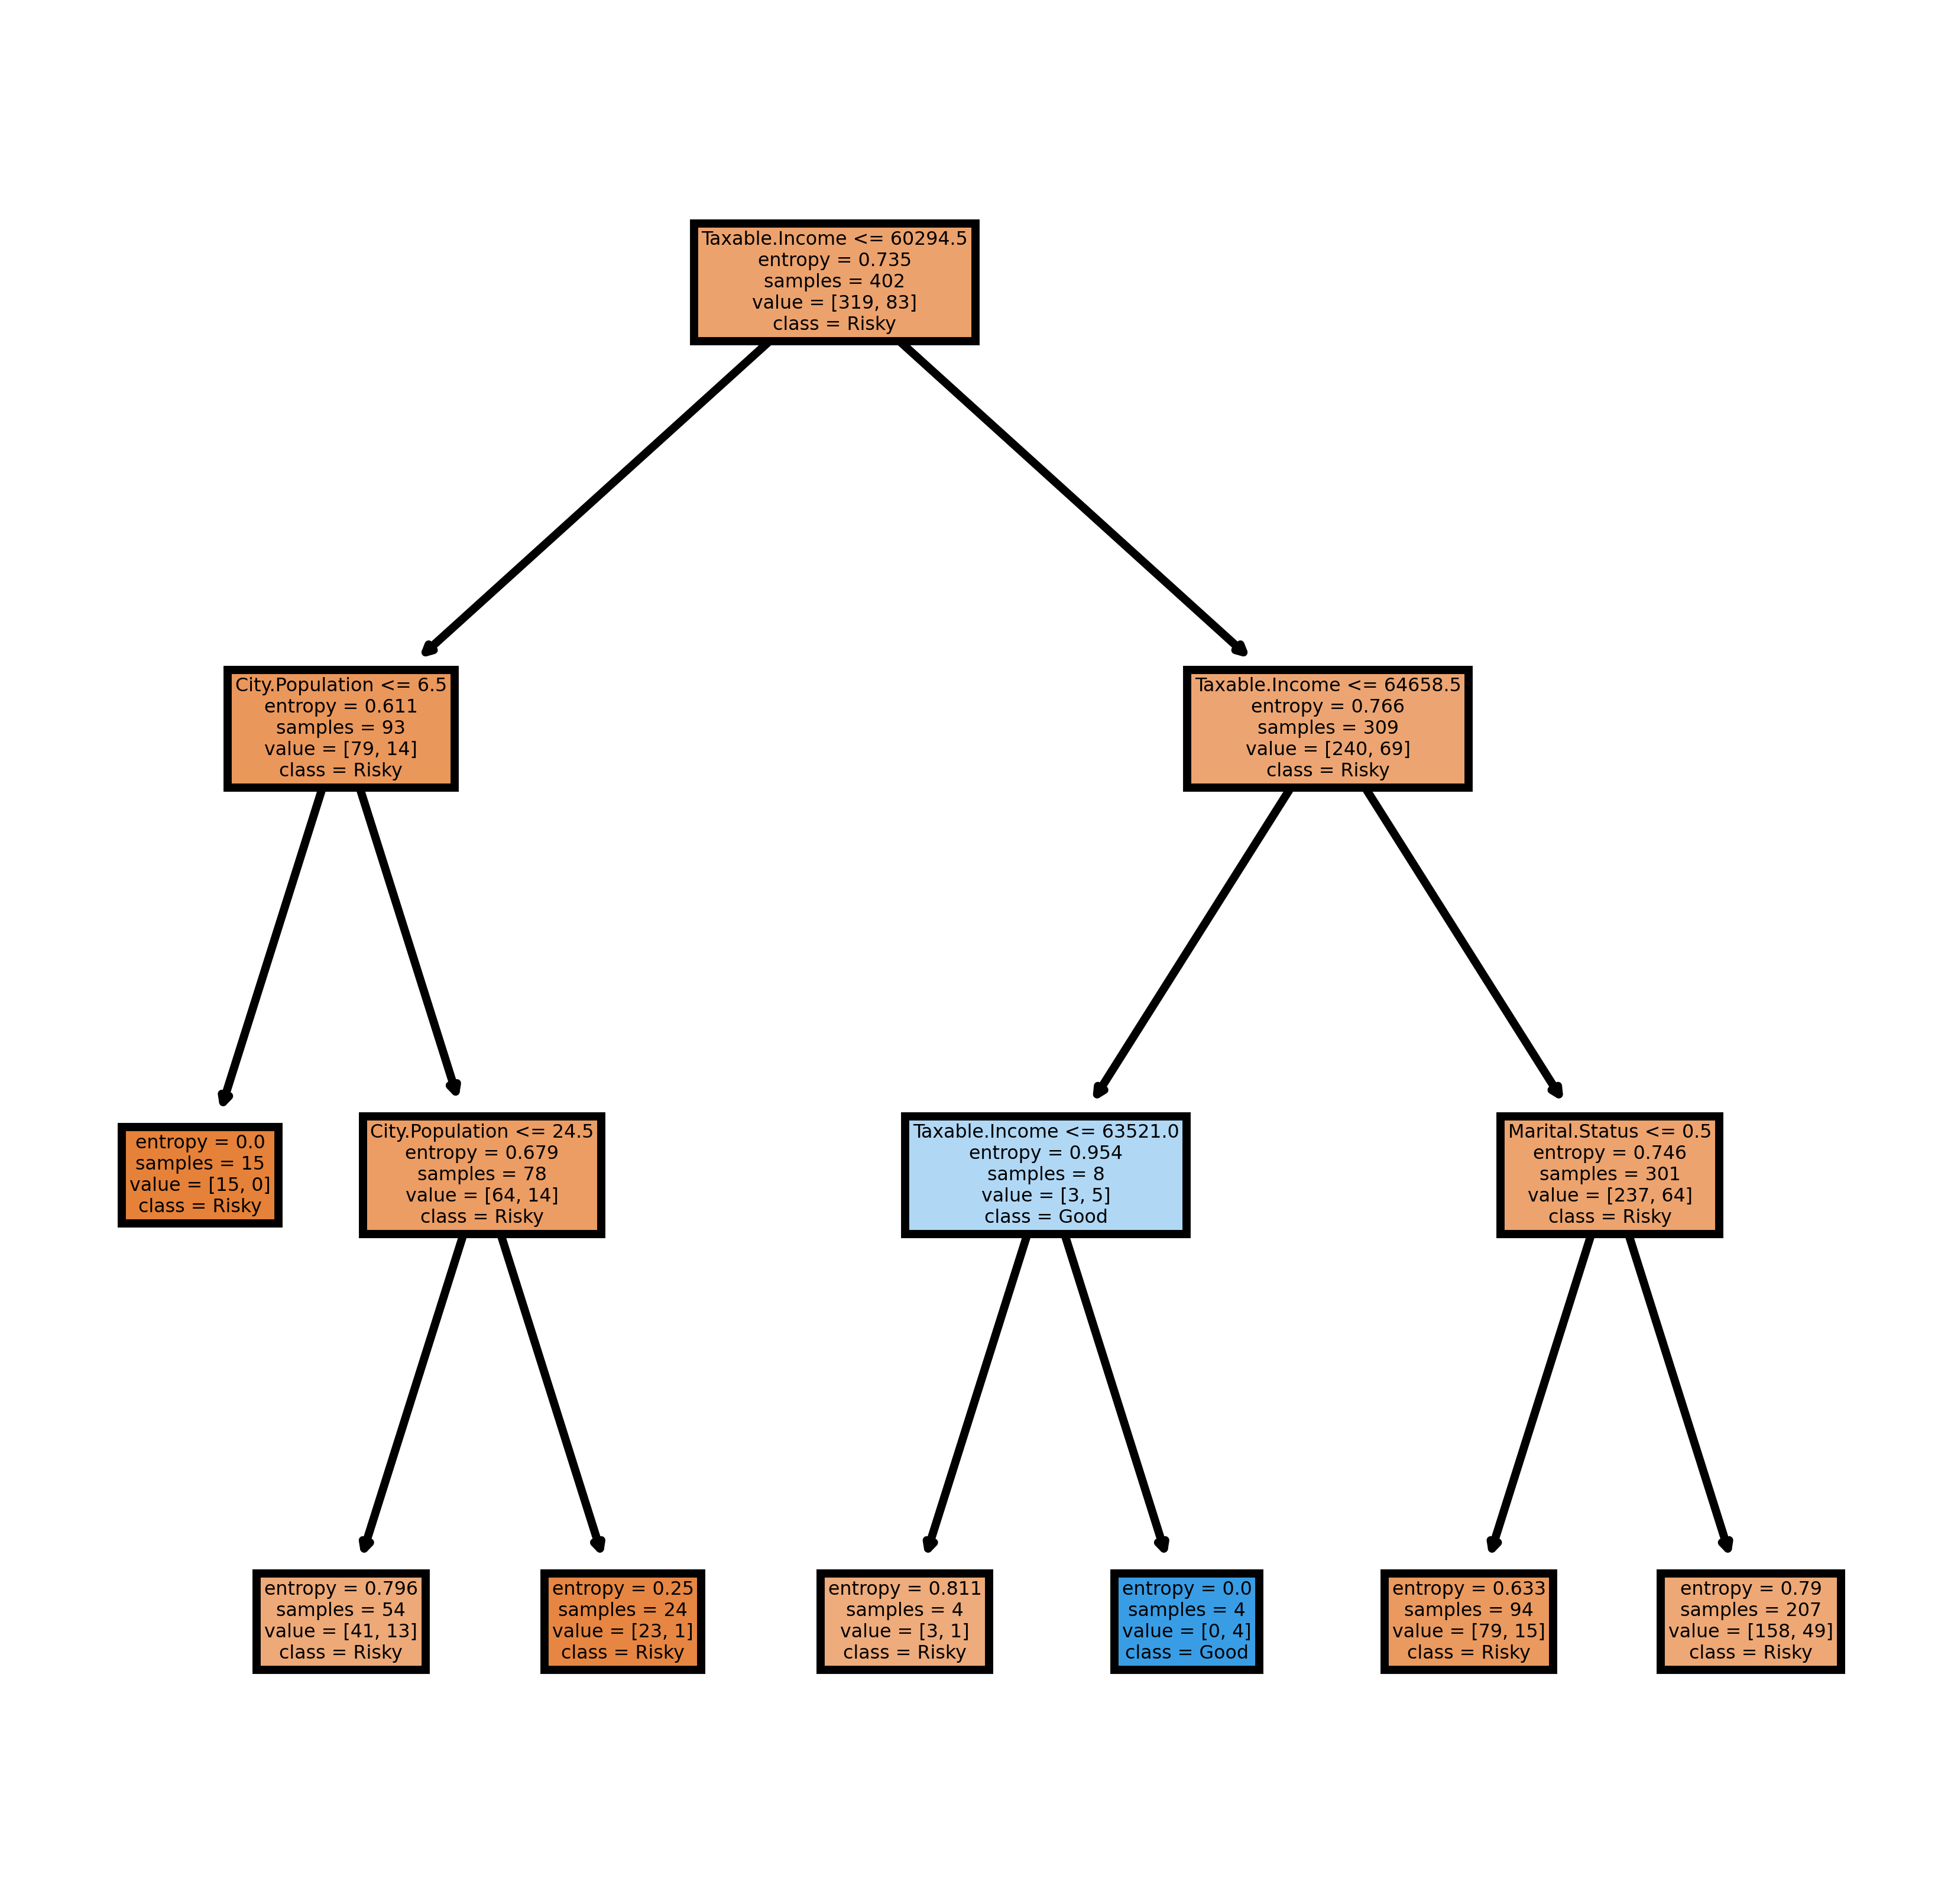

In [68]:
fn = ['Undergrad','Marital.Status','Taxable.Income','City.Population','Work.Experience','Urban']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 1000)
tree.plot_tree(model);
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [69]:
preds = model.predict(X_test) 
pd.Series(preds).value_counts() 


0    197
1      1
dtype: int64

In [70]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [71]:
pd.crosstab(y_test, preds)

col_0,0,1
status,,
0,156,1
1,41,0


In [72]:
from sklearn import metrics
metrics.accuracy_score(preds,y_test)

0.7878787878787878

In [73]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88       157
           1       0.00      0.00      0.00        41

    accuracy                           0.79       198
   macro avg       0.40      0.50      0.44       198
weighted avg       0.63      0.79      0.70       198



In [74]:
print(confusion_matrix(y_test,preds))

[[156   1]
 [ 41   0]]


## Building Model by Gini Criterion

In [75]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 10,min_samples_split=2)
model_gini

DecisionTreeClassifier(max_depth=10)

In [76]:
model_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

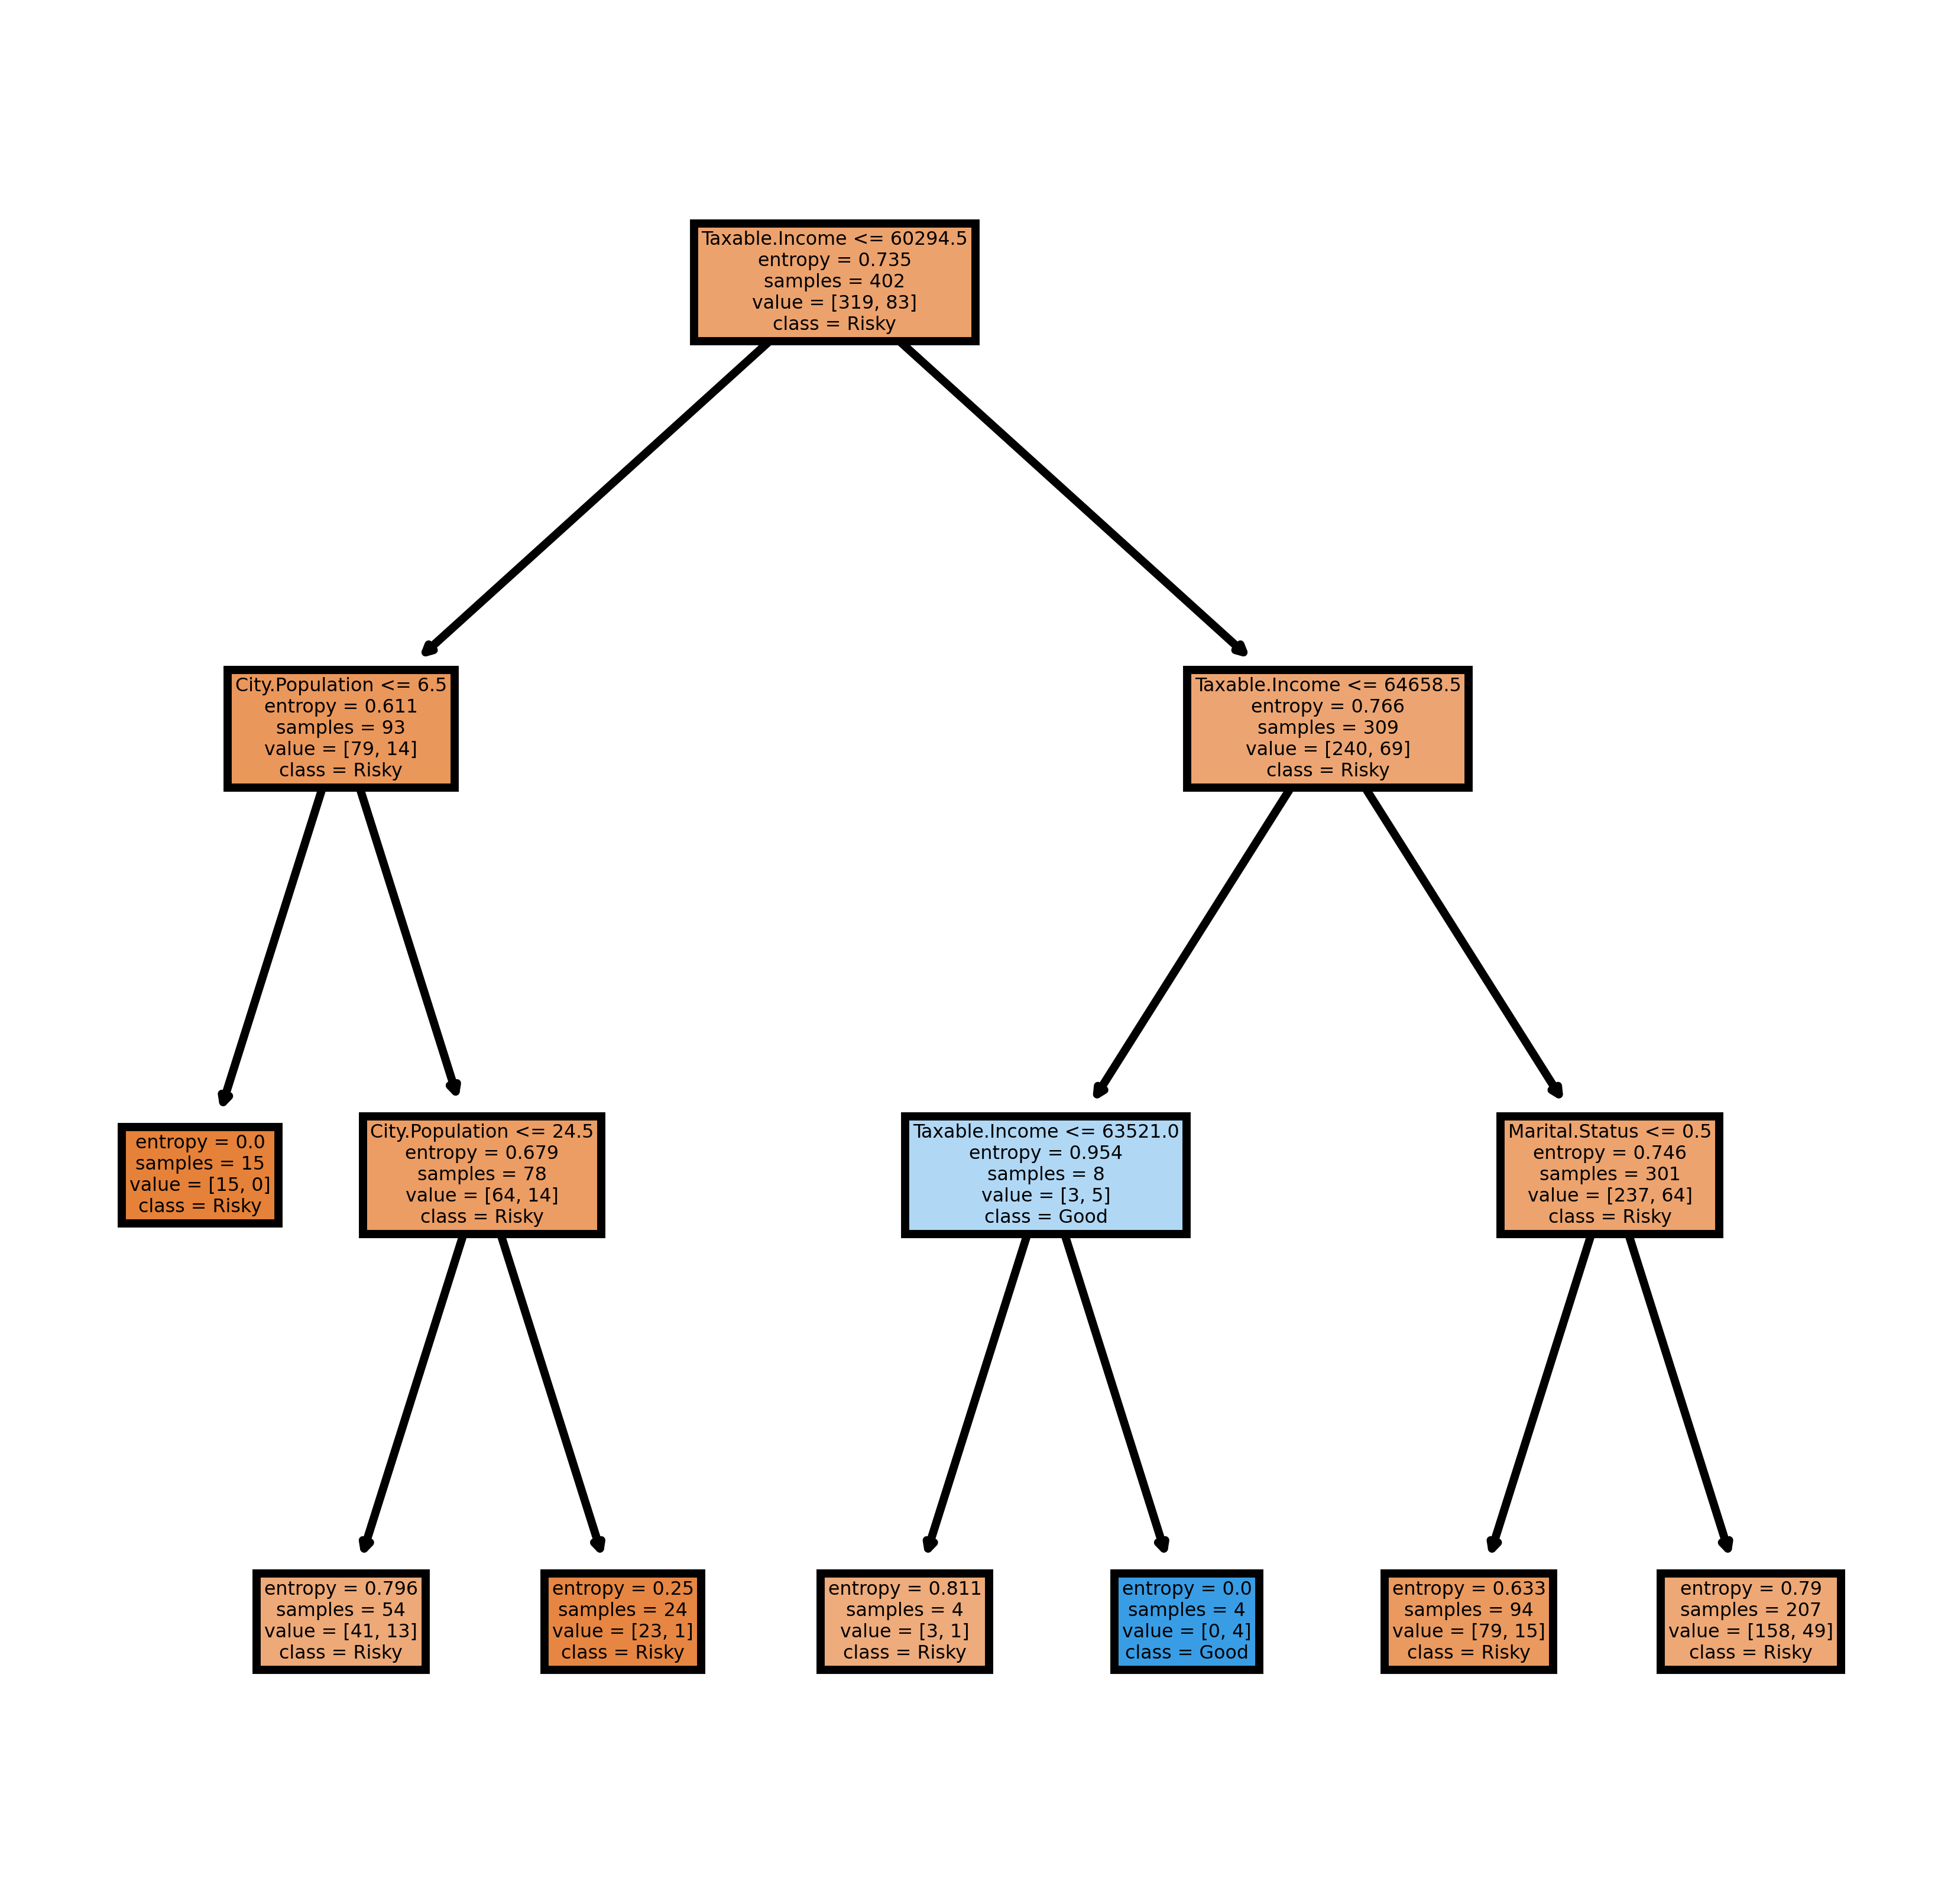

In [77]:
fn = ['Undergrad','Marital.Status','Taxable.Income','City.Population','Work.Experience','Urban']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 1000)
tree.plot_tree(model);
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [78]:
pred = model_gini.predict(X_test)
np.mean(pred == y_test)

0.7070707070707071

In [79]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       157
           1       0.24      0.20      0.22        41

    accuracy                           0.71       198
   macro avg       0.52      0.52      0.52       198
weighted avg       0.68      0.71      0.69       198



In [80]:
print(confusion_matrix(y_test,pred))

[[132  25]
 [ 33   8]]
